In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Algorithm

In [2]:
from PIL import Image

def pca_reconstruct_image(path, k):
    img = Image.open(path).convert('L')
    
    img_data = np.array(img, dtype=float)
    
    img_mean = np.mean(img_data, axis=0)
    img_centered = img_data - img_mean
    
    covariance_matrix = np.dot(img_centered.T, img_centered) / (img_centered.shape[0] - 1)

    eig_values, eig_vectors = np.linalg.eig(covariance_matrix)
    eig_values = eig_values.real
    eig_vectors = eig_vectors.real

    sorted_index = np.argsort(eig_values)[::-1]
    sorted_eig_values = eig_values[sorted_index]
    sorted_eig_vectors = eig_vectors[:, sorted_index]

    top_k_eig_vectors = sorted_eig_vectors[:, :k]

    data_reduced = np.dot(img_centered, top_k_eig_vectors)

    reconstructed_data = np.dot(data_reduced, top_k_eig_vectors.T) + img_mean

    reconstructed_data = np.clip(reconstructed_data, 0, 255)
    reconstructed_img = Image.fromarray(reconstructed_data.astype(np.uint8))

    return reconstructed_img

#### Execution

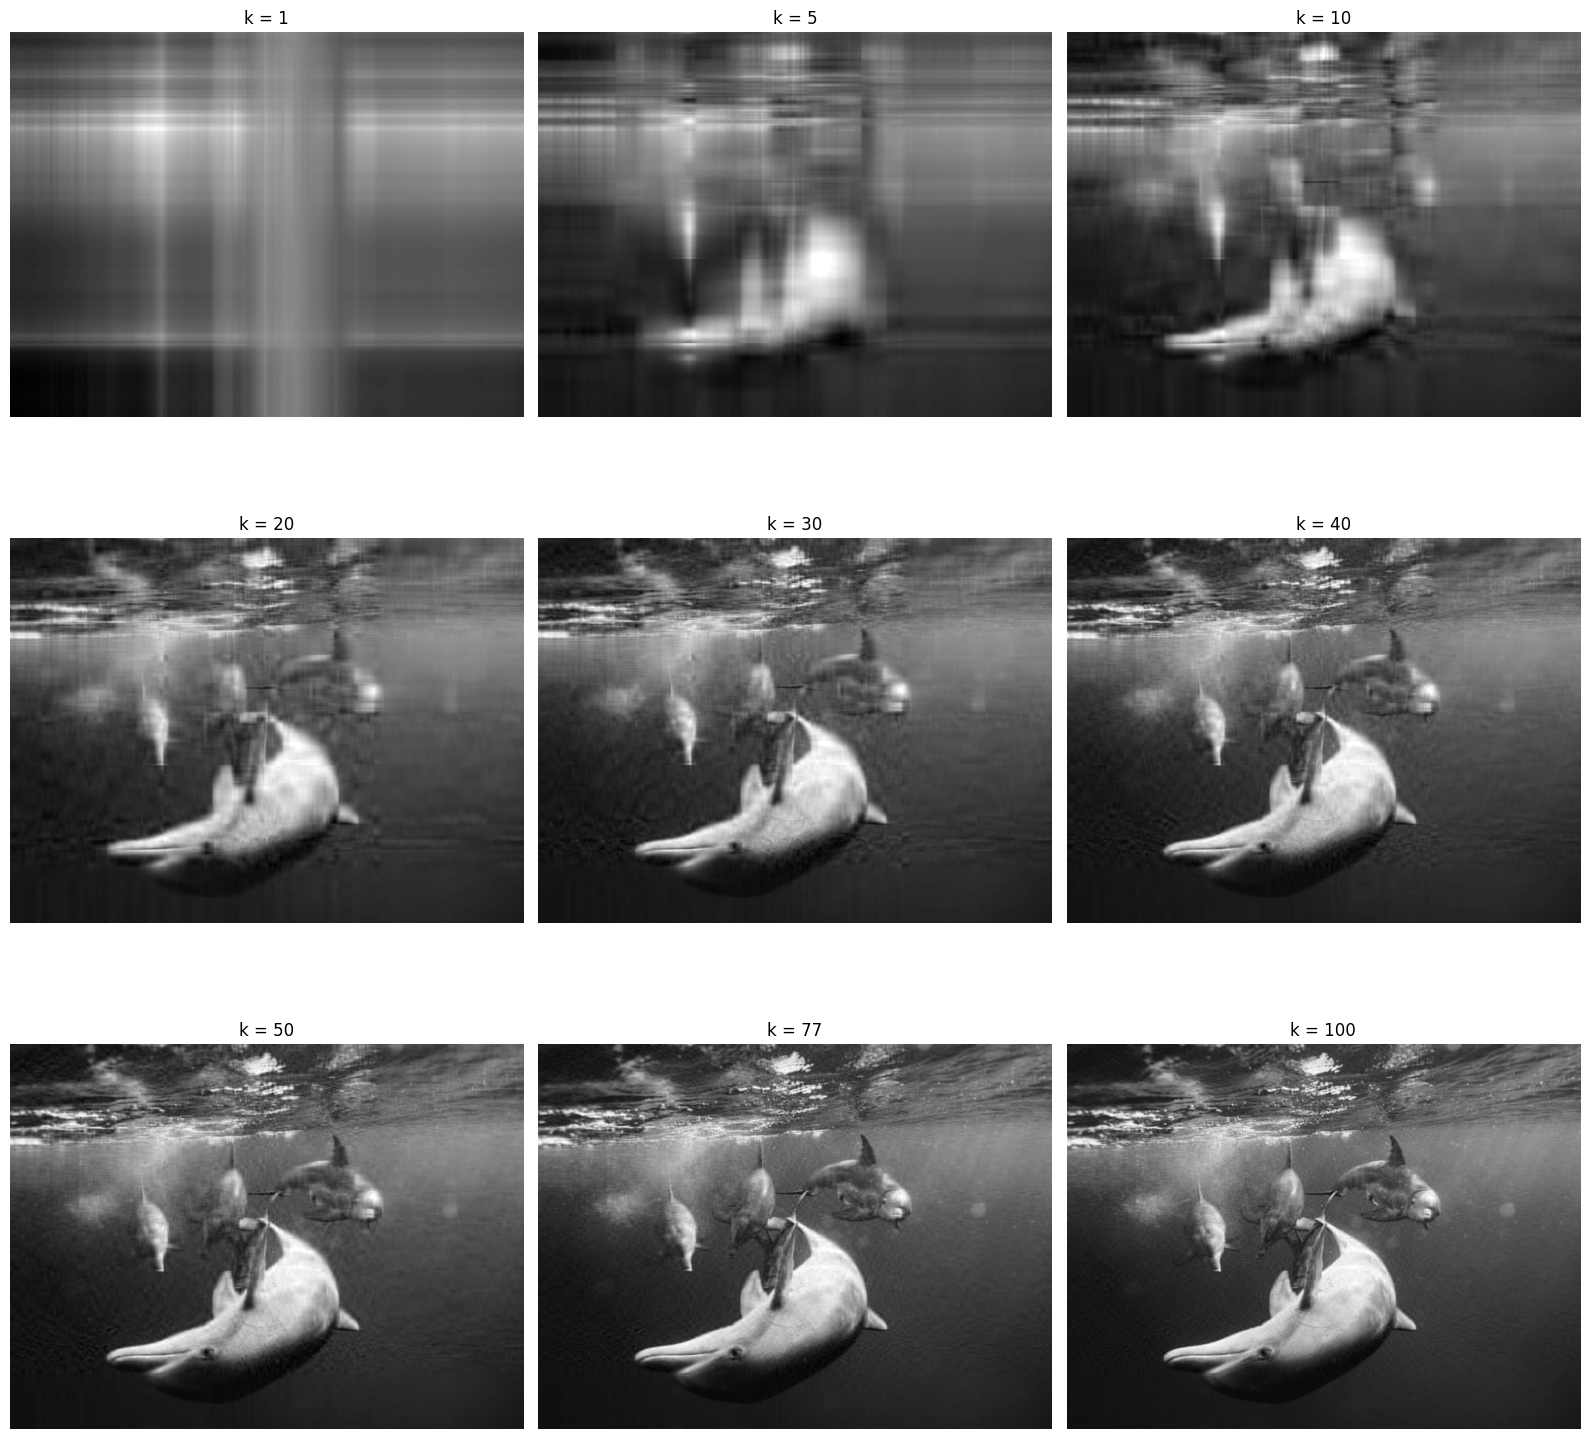

In [3]:
k_values = [1, 5, 10, 20, 30, 40, 50, 77, 100]
fig, axes = plt.subplots(3, 3, figsize=(16, 16))

for ax, k in zip(axes.flat, k_values):
    ax.imshow(pca_reconstruct_image('dolphines.jpg', k), cmap='gray')
    ax.set_title(f'k = {k}')
    ax.axis('off')
    
plt.tight_layout()
plt.show()

#### RGB version

95% wariancji jest wyjaśnianych przez 24 pierwsze główne składowe.


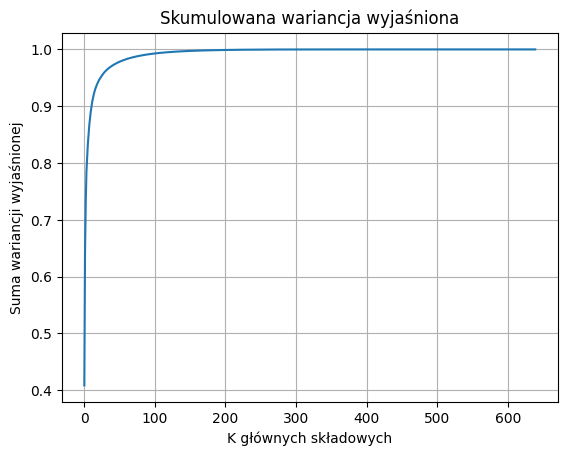

In [4]:
img = Image.open('dolphines.jpg').convert('L')
    
img_data = np.array(img, dtype=float)

img_mean = np.mean(img_data, axis=0)
img_centered = img_data - img_mean

covariance_matrix = np.dot(img_centered.T, img_centered) / (img_centered.shape[0] - 1)

eig_values, _ = np.linalg.eig(covariance_matrix)
eig_values = eig_values.real

sorted_eig_values = np.sort(eig_values)[::-1]

explained_variances = sorted_eig_values / np.sum(sorted_eig_values)
cumulative_explained_variances = np.cumsum(explained_variances)
print(f"95% wariancji jest wyjaśnianych przez {np.argmax(cumulative_explained_variances > 0.95) + 1} pierwsze główne składowe.")

plt.plot(cumulative_explained_variances)
plt.title("Skumulowana wariancja wyjaśniona")
plt.xlabel("K głównych składowych")
plt.ylabel("Suma wariancji wyjaśnionej")
plt.grid(True)
plt.show()

In [5]:
def pca_reconstruct_rgb_image(path, k):
    img = Image.open(path)
    img_data = np.array(img, dtype=float)
    
    channels = []
    for i in range(3):
        channel_data = img_data[:, :, i]
        
        channel_mean = np.mean(channel_data, axis=0)
        channel_centered = channel_data - channel_mean
        
        covariance_matrix = np.dot(channel_centered.T, channel_centered) / (channel_centered.shape[0] - 1)
        
        eig_values, eig_vectors = np.linalg.eig(covariance_matrix)
        eig_values = eig_values.real
        eig_vectors = eig_vectors.real
        
        sorted_index = np.argsort(eig_values)[::-1]
        sorted_eig_values = eig_values[sorted_index]
        sorted_eig_vectors = eig_vectors[:, sorted_index]
        
        top_k_eig_vectors = sorted_eig_vectors[:, :k]
        
        data_reduced = np.dot(channel_centered, top_k_eig_vectors)
        
        reconstructed_data = np.dot(data_reduced, top_k_eig_vectors.T) + channel_mean
        reconstructed_data = np.clip(reconstructed_data, 0, 255)
        
        channels.append(reconstructed_data)
    
    reconstructed_img_data = np.stack(channels, axis=2).astype(np.uint8)
    reconstructed_img = Image.fromarray(reconstructed_img_data)
    
    return reconstructed_img

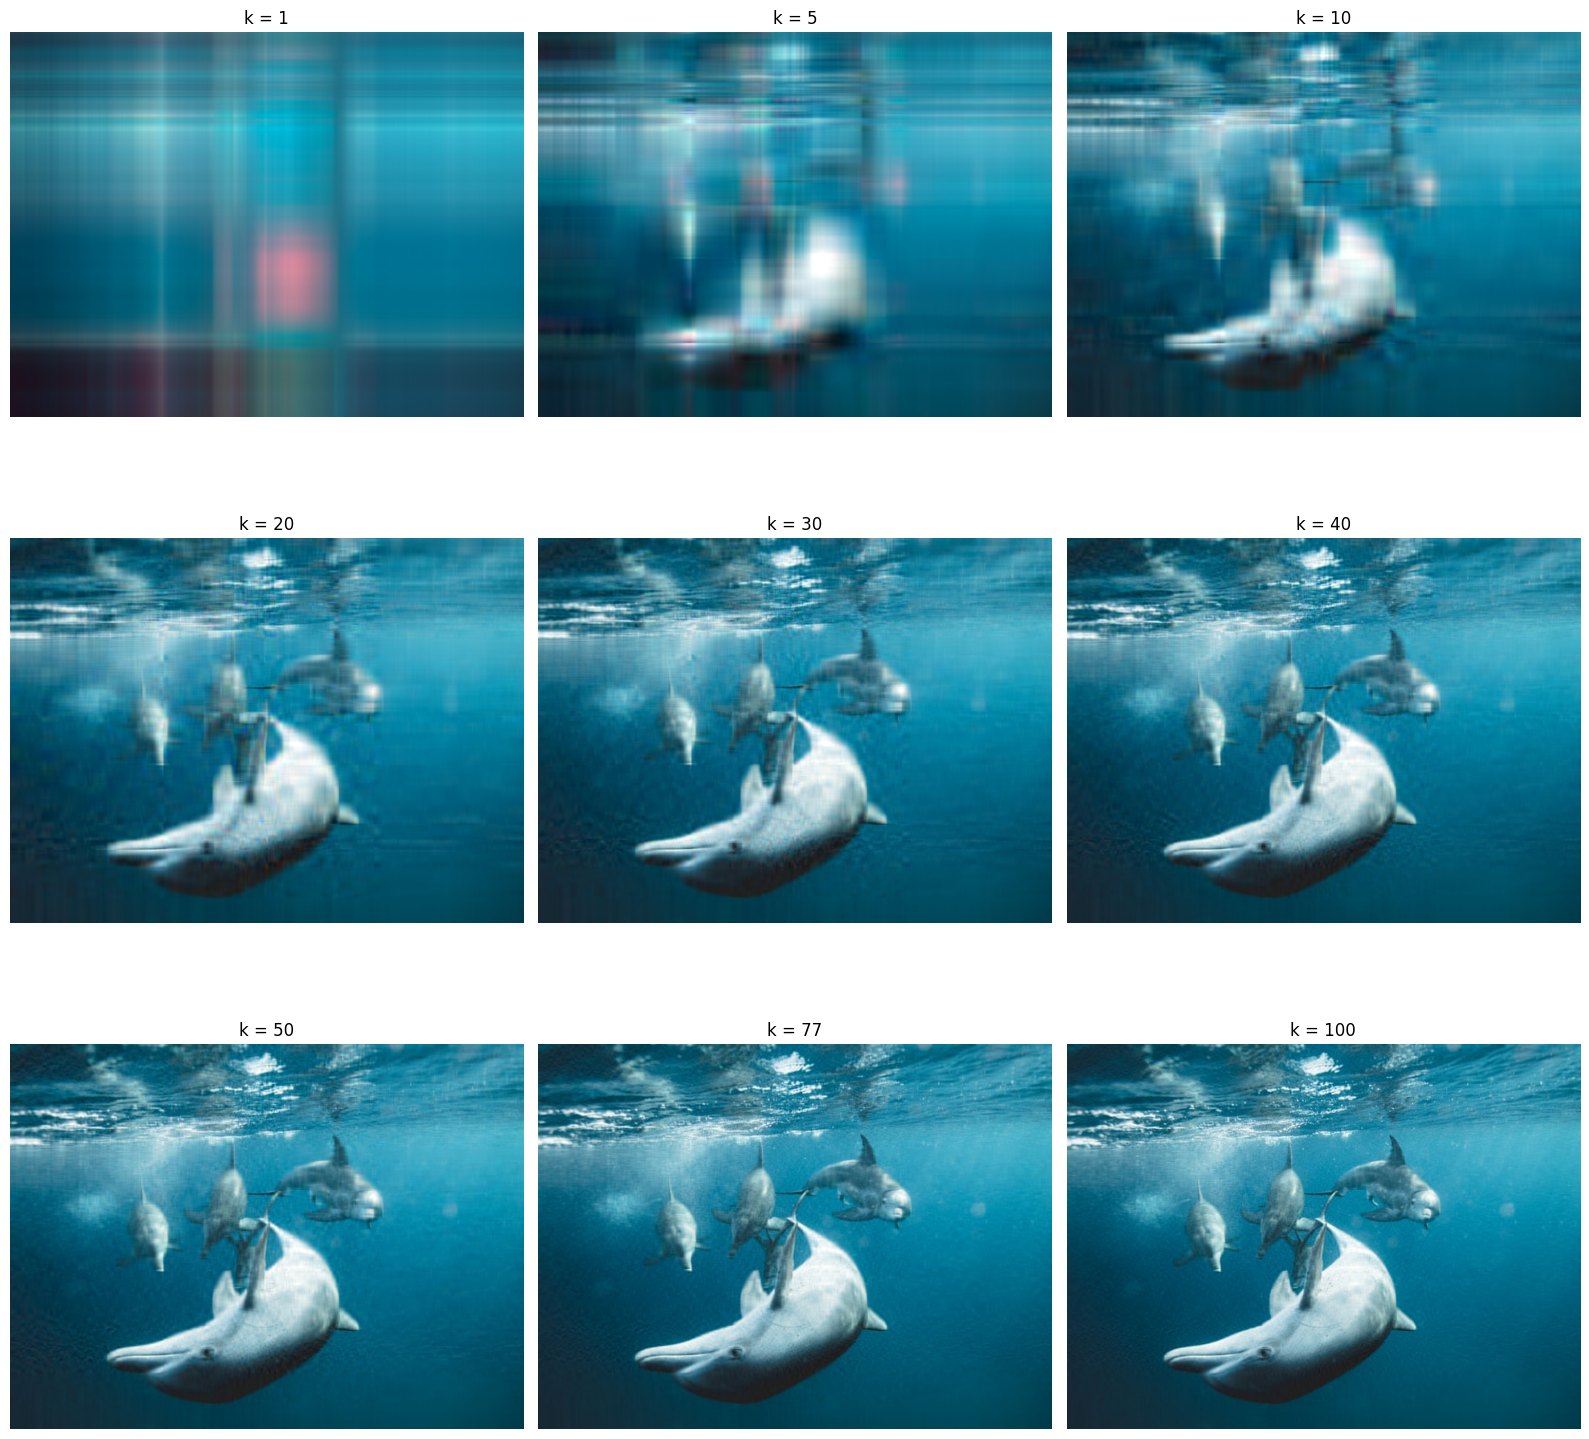

In [6]:
k_values = [1, 5, 10, 20, 30, 40, 50, 77, 100]
fig, axes = plt.subplots(3, 3, figsize=(16, 16))

for ax, k in zip(axes.flat, k_values):
    ax.imshow(pca_reconstruct_rgb_image('dolphines.jpg', k))
    ax.set_title(f'k = {k}')
    ax.axis('off')
    
plt.tight_layout()
plt.show()

#### Iris data

In [7]:
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

K = 2

iris = datasets.load_iris()

scaler = MinMaxScaler()
X = scaler.fit_transform(iris.data)
y = iris.target

X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

covariance_matrix = np.dot(X.T, X) / (X.shape[0] - 1)

eig_values, eig_vectors = np.linalg.eig(covariance_matrix)
eig_values = eig_values.real
eig_vectors = eig_vectors.real

sorted_index = np.argsort(eig_values)[::-1]
sorted_eig_values = eig_values[sorted_index]
sorted_eig_vectors = eig_vectors[:, sorted_index]

top_k_eig_vectors = sorted_eig_vectors[:, :K]

X_reduced = np.dot(X_centered, top_k_eig_vectors)

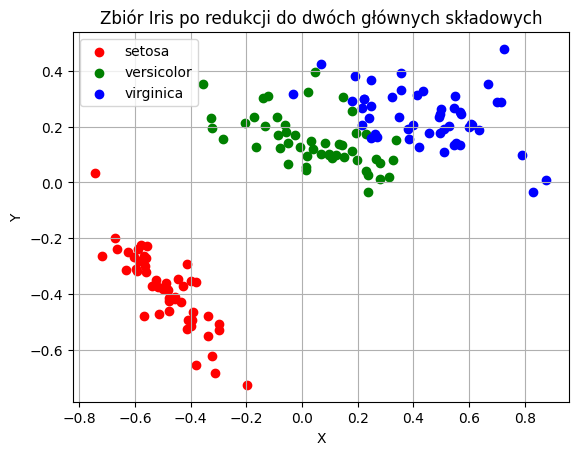

In [8]:
plt.scatter(X_reduced[:, 0][y == 0], X_reduced[:, 1][y == 0], c="red")
plt.scatter(X_reduced[:, 0][y == 1], X_reduced[:, 1][y == 1], c="green")
plt.scatter(X_reduced[:, 0][y == 2], X_reduced[:, 1][y == 2], c="blue")
plt.title("Zbiór Iris po redukcji do dwóch głównych składowych")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.legend(iris.target_names)
plt.show()

In [9]:
K = 3

iris = datasets.load_iris()

scaler = MinMaxScaler()
X = scaler.fit_transform(iris.data)
y = iris.target

X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

covariance_matrix = np.dot(X.T, X) / (X.shape[0] - 1)

eig_values, eig_vectors = np.linalg.eig(covariance_matrix)
eig_values = eig_values.real
eig_vectors = eig_vectors.real

sorted_index = np.argsort(eig_values)[::-1]
sorted_eig_vectors = eig_vectors[:, sorted_index]

top_k_eig_vectors = sorted_eig_vectors[:, :K]

X_reduced = np.dot(X_centered, top_k_eig_vectors)

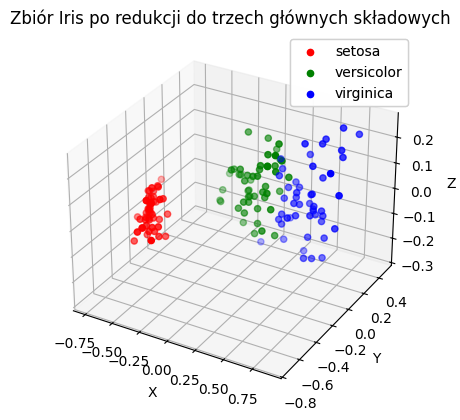

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_reduced[:, 0][y == 0], X_reduced[:, 1][y == 0], X_reduced[:, 2][y == 0], c="red")
ax.scatter(X_reduced[:, 0][y == 1], X_reduced[:, 1][y == 1], X_reduced[:, 2][y == 1], c="green")
ax.scatter(X_reduced[:, 0][y == 2], X_reduced[:, 1][y == 2], X_reduced[:, 2][y == 2], c="blue")

ax.set_title("Zbiór Iris po redukcji do trzech głównych składowych")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

legend1 = ax.legend(iris.target_names)
ax.add_artist(legend1)

plt.show()